In [1]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# SGM files to Dataframe

## Sgm to BeautifulSoup

In [2]:
"""
Read all the SGM files in Data 
"""
data = ""
for file in os.listdir("data"):
    if file.endswith(".sgm"):
        with open(os.path.join("data", file)) as f:
            data += f.read() + "\n"

In [3]:
soup = BeautifulSoup(data)

In [4]:
#Gets all articles in a list
articles = soup.findAll('reuters')
len(articles)

21578

In [5]:
articles[0]

<reuters cgisplit="TRAINING-SET" lewissplit="TRAIN" newid="1" oldid="5544" topics="YES">
<date>26-FEB-1987 15:01:01.79</date>
<topics><d>cocoa</d></topics>
<places><d>el-salvador</d><d>usa</d><d>uruguay</d></places>
<people></people>
<orgs></orgs>
<exchanges></exchanges>
<companies></companies>
<unknown> 
C T
f0704reute
u f BC-BAHIA-COCOA-REVIEW   02-26 0105</unknown>
<text>
<title>BAHIA COCOA REVIEW</title>
<dateline>    SALVADOR, Feb 26 - </dateline>Showers continued throughout the week in
the Bahia cocoa zone, alleviating the drought since early
January and improving prospects for the coming temporao,
although normal humidity levels have not been restored,
Comissaria Smith said in its weekly review.
    The dry period means the temporao will be late this year.
    Arrivals for the week ended February 22 were 155,221 bags
of 60 kilos making a cumulative total for the season of 5.93
mln against 5.81 at the same stage last year. Again it seems
that cocoa delivered earlier on consignmen

In [6]:
#Articles can have multiple topics
col_values = articles[998].find('topics').findAll('d')
[(t.get_text()) for t in col_values]

['money-fx', 'interest']

## BeautifulSoup to DataFrame

In [8]:
target_topics = ["money-fx", "ship", "interest", "acq", "earn"]
columns = ["date", 'topics', "places", "people", "orgs", "exchanges", "companies", "text"]

In [9]:
def extract_col(col):
    #Get the value of the column Tag. Replace non-target topics with 'other'.
    tag_col = a.find(col)
    if col in ["topics", "places", "people", "orgs", "exchanges", "companies"]:   # Make a list rather than str
        tag_col_d = tag_col.findAll('d')
        val = [t.get_text() for t in tag_col_d]
        
        if col == "topics" and True not in [(t in target_topics) for t in val]:  # If there is no target topics, put ['other']
            val = ["other"]

    else:
        val = tag_col.get_text()
        
    return val

In [10]:
# Transform the list of articles (bs4.element.Tag) into a list ready to be in a Dataframe
articles_df = []
for i, a in enumerate(articles):
    art = {}
    for col in columns:
        art[col] = extract_col(col)
    articles_df.append(art)    

In [11]:
articles_df[0]

{'date': '26-FEB-1987 15:01:01.79',
 'topics': ['other'],
 'places': ['el-salvador', 'usa', 'uruguay'],
 'people': [],
 'orgs': [],
 'exchanges': [],
 'companies': [],
 'text': '\nBAHIA COCOA REVIEW\n    SALVADOR, Feb 26 - Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\n

In [12]:
df = pd.DataFrame(articles_df)

In [13]:
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,[other],"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,[other],[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,[other],[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,[other],"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,[other],[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21573,19-OCT-1987 00:34:08.94,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21574,19-OCT-1987 00:18:22.79,[other],[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21575,19-OCT-1987 00:05:11.26,[other],[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21576,19-OCT-1987 00:03:21.69,[other],[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


# Dataframe preparation

In [14]:
#We will work on the 5 target topics + one that groups all the others
target_topics.append("other")

### Remove non-target topics in articles with multiples topics

In [15]:
#Goes through all the rows and keeps only the target topics (including others)
new_topics = []
for row_topics in df.topics.values:
    new_row_topics = []
    for t in row_topics:
        if t in target_topics:
            new_row_topics.append(t) 
    new_topics.append(new_row_topics)
new_topics = np.array(new_topics,dtype=object)

df.topics = new_topics

In [16]:
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,[other],"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,[other],[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,[other],[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,[other],"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,[other],[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21573,19-OCT-1987 00:34:08.94,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21574,19-OCT-1987 00:18:22.79,[other],[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21575,19-OCT-1987 00:05:11.26,[other],[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21576,19-OCT-1987 00:03:21.69,[other],[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


### Remove articles with 2 or more target topics

In [17]:
cmt = 0
for topics in df.topics.values:
    if len(topics) != 1:
        cmt += 1
        
print("Number of articles with at least 2 target topics :", cmt)

Number of articles with at least 2 target topics : 230


In [18]:
df = df[[len(t) == 1 for t in df.topics]].reset_index(drop=True)
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,[other],"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,[other],[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,[other],[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,[other],"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,[other],[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21343,19-OCT-1987 00:34:08.94,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21344,19-OCT-1987 00:18:22.79,[other],[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21345,19-OCT-1987 00:05:11.26,[other],[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21346,19-OCT-1987 00:03:21.69,[other],[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


### Clean  Dataframe

In [19]:
#Change the topics column type from list to str
#There is only one topic per line
column_topic = []
for topics in df.topics.values:
    column_topic.append(topics[0])
column_topic = np.array(column_topic,dtype=object)
df.topics = column_topic

In [20]:
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,other,"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,other,[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,other,[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,other,"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,other,[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21343,19-OCT-1987 00:34:08.94,ship,"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21344,19-OCT-1987 00:18:22.79,other,[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21345,19-OCT-1987 00:05:11.26,other,[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21346,19-OCT-1987 00:03:21.69,other,[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


other       13754
earn         3967
acq          2422
money-fx      597
interest      310
ship          298
Name: topics, dtype: int64


<AxesSubplot: >

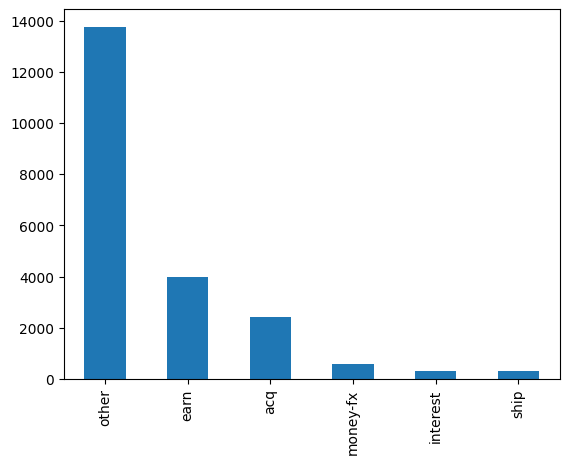

In [21]:
print(df.topics.value_counts())
df.topics.value_counts().plot(kind='bar')

# Data Analysis

In [22]:
#For the analysis, we seperate the dataframe in 6 according to each topic
df_topics = {"earn":None, "acq":None, "money-fx":None, "interest":None, "ship":None, "other":None}
for key in df_topics.keys():
    df_topics[key] = df[[t == key for t in df.topics]].reset_index(drop=True)

### Number of Words

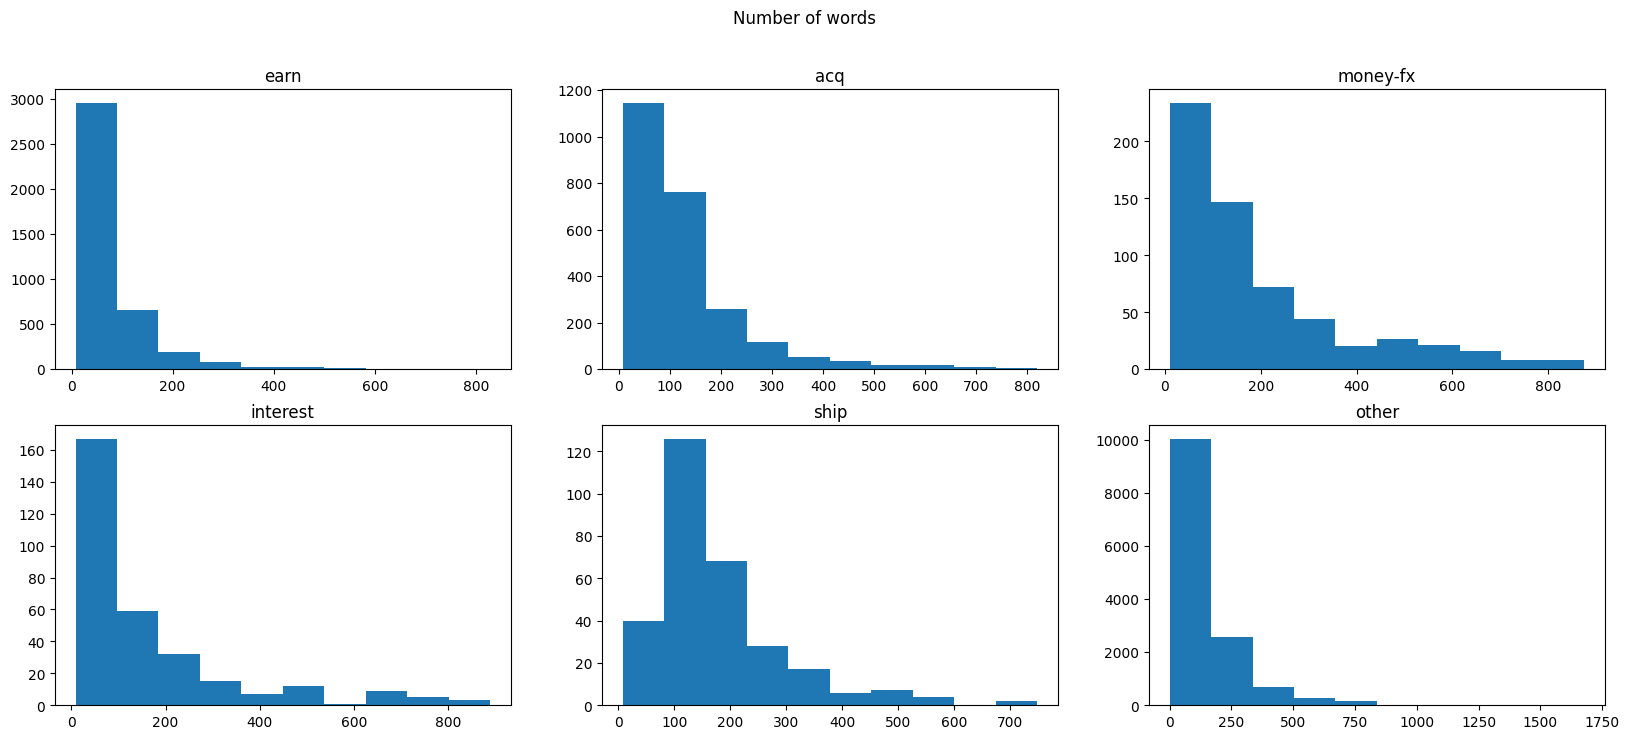

In [23]:
#Plot the histograms of the number of words per article
fig, axs = plt.subplots(2, 3)
fig.suptitle('Number of words')
fig.set_size_inches(20, 8)

keys = list(df_topics.keys())
k = 0
for i in range(2):
    for j in range(3):
        axs[i, j].set_title(keys[k])
        axs[i, j].hist(df_topics[keys[k]].text.str.split().map(lambda x: len(x)))
        k += 1
plt.show()

In [24]:
from wordcloud import WordCloud, STOPWORDS

#STOPWORDS = the, of, and...
STOPWORDS.update(["said", "reuter"]) 

### Frequencies StopWord

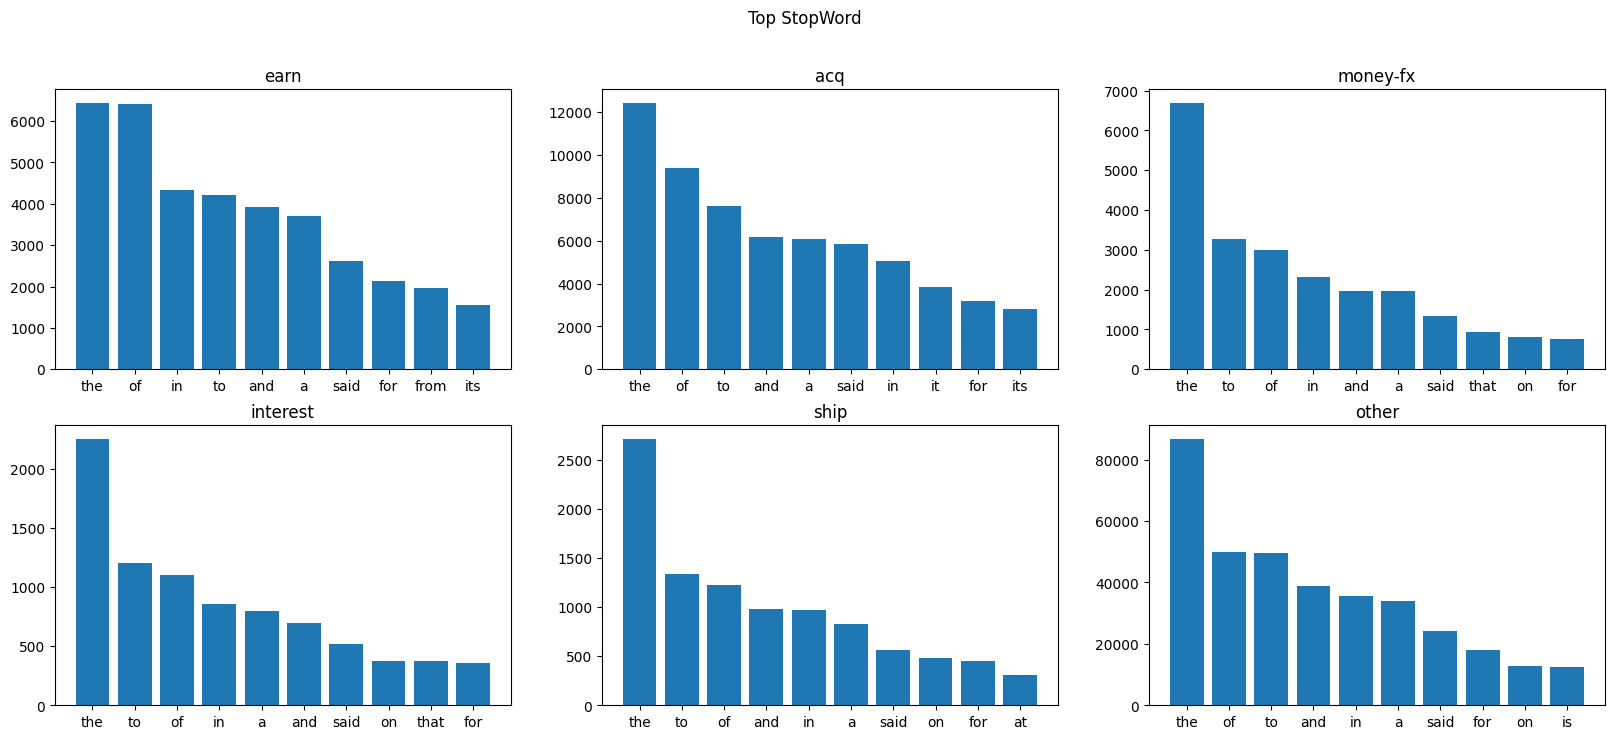

In [25]:
#Plot the histograms of the top stopwords for each category
def freq_stopword(key):
    corpus = []
    articles = df_topics[key].text.str.split()
    articles = articles.values.tolist()
    corpus = [word for i in articles for word in i]

    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in STOPWORDS:
            dic[word]+=1
    return dic

fig, axs = plt.subplots(2, 3)
fig.suptitle('Top StopWord')
fig.set_size_inches(20, 8)

keys = list(df_topics.keys())
k = 0
for i in range(2):
    for j in range(3):
        print()
        top = sorted(freq_stopword(keys[k]).items(), key=lambda x:x[1],reverse=True)[:10]
        x, y = zip(*top)
        axs[i, j].set_title(keys[k])
        axs[i, j].bar(x, y)
        k += 1
plt.show()


### WORD CLOUD

In [26]:
def getWordCloud(df):
    comment_words = ''
    stopwords = set(STOPWORDS)          # remove stop word (was, and, but...)
    
    for val in df.text: 
        val = str(val) 
        tokens = val.split()
        
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens) + " "
        
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
    return wordcloud

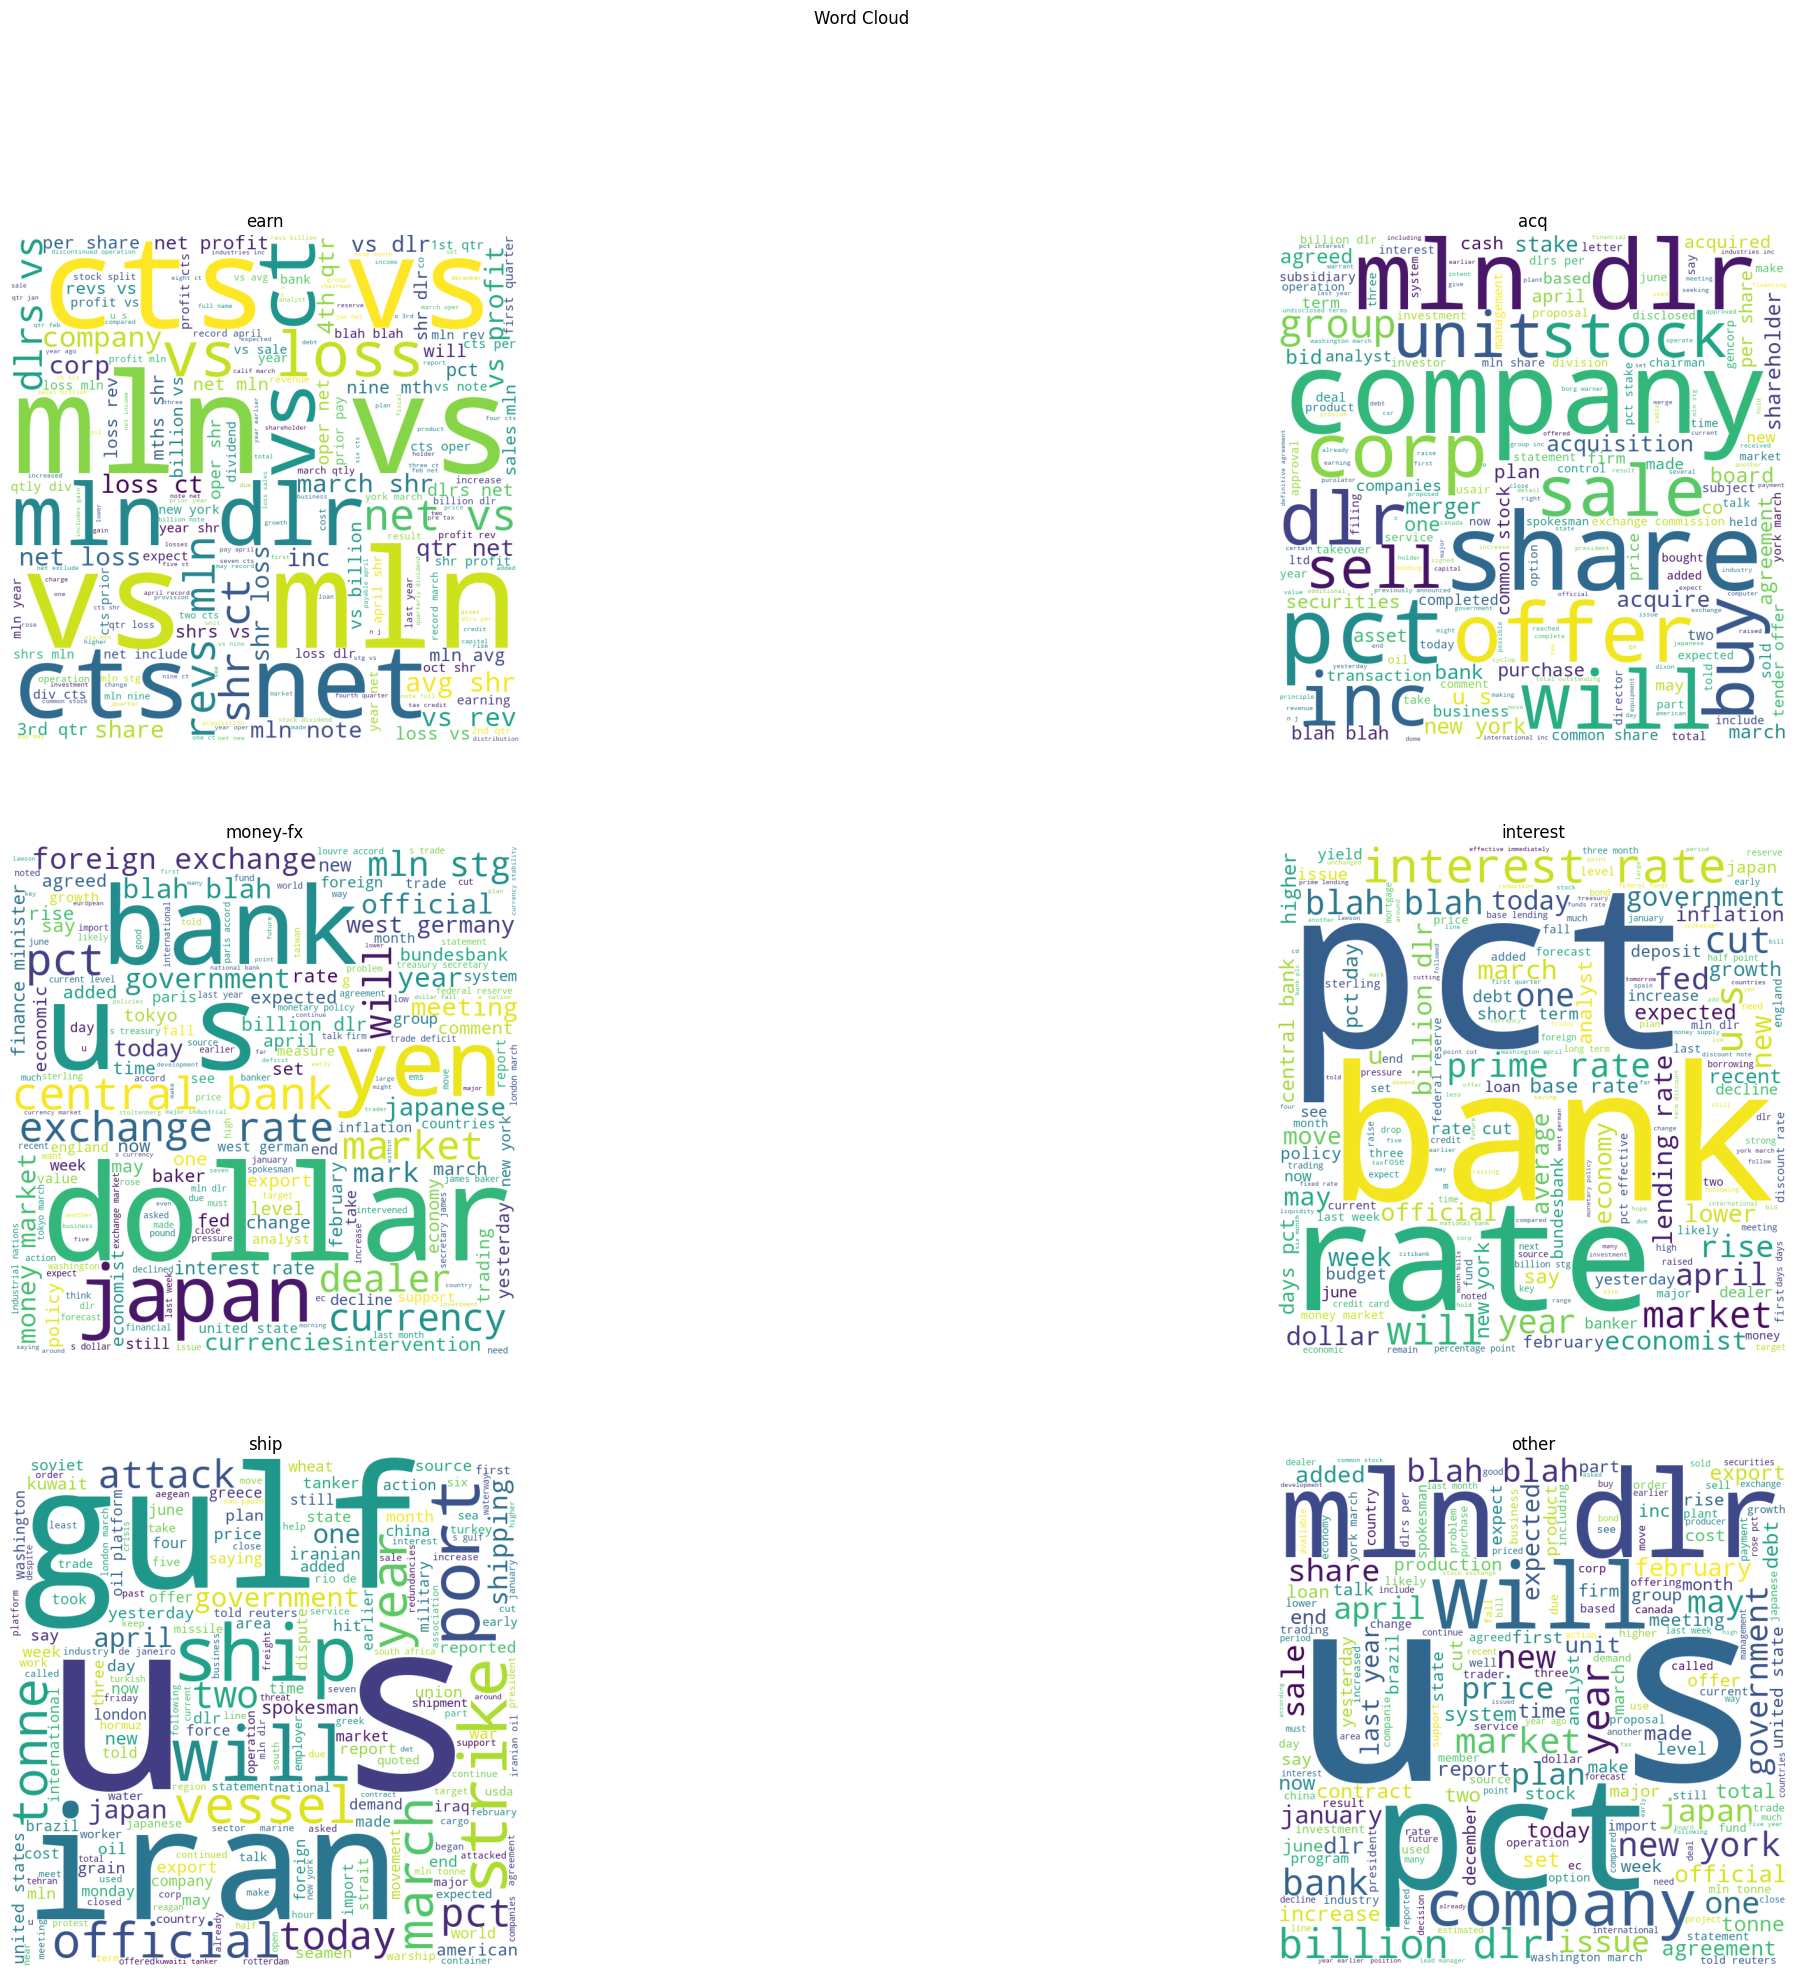

In [27]:
#Plot the Word Cloud of the top words (excluding StopWords) for each category
fig, axs = plt.subplots(3, 2)
fig.suptitle('Word Cloud')
fig.set_size_inches(30, 22.5)

keys = list(df_topics.keys())
k = 0
for i in range(3):
    for j in range(2):
        axs[i, j].set_title(keys[k])
        axs[i, j].imshow(getWordCloud(df_topics[keys[k]]))
        axs[i, j].axis("off")
        k += 1

plt.show()

### Entity Frequencies

In [ ]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")

0
1
2
3
4
5


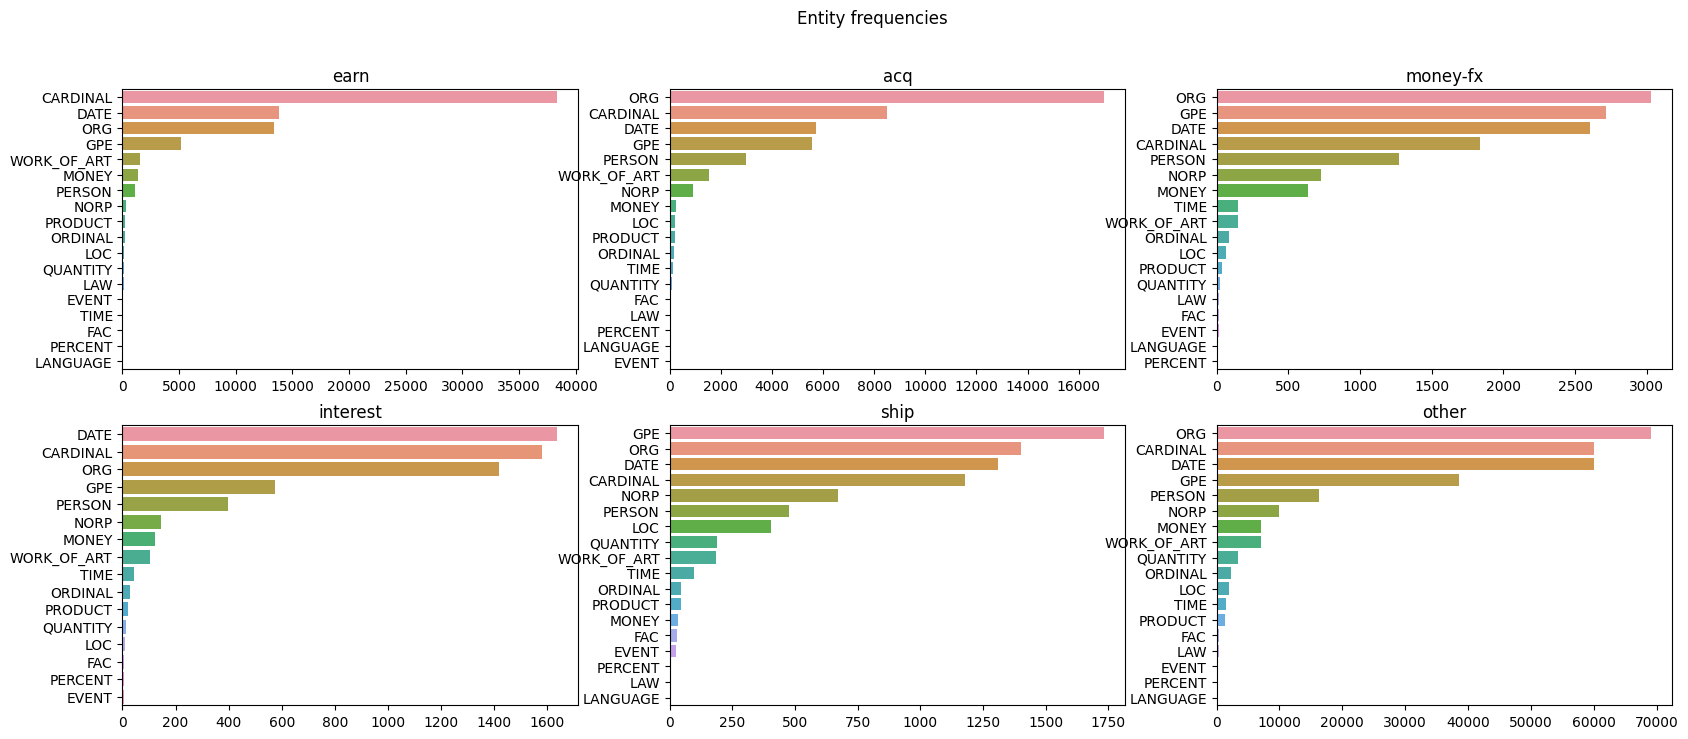

In [450]:
#Plot the barplot of the frequencies of entities for each category
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

fig, axs = plt.subplots(2, 3)
fig.suptitle('Entity frequencies')
fig.set_size_inches(20, 8)

keys = list(df_topics.keys())
k = 0
for i in range(2):
    for j in range(3):
        print(k)
        ent = df_topics[keys[k]].text.apply(lambda x : ner(x))
        ent = [x for sub in ent for x in sub]

        counter = Counter(ent)
        count = counter.most_common()
        
        x, y = map(list,zip(*count))
        axs[i, j].set_title(keys[k])
        sns.barplot(ax=axs[i, j], x=y, y=x)
        k += 1
plt.show()

# PREDICTION

In [28]:
topics_names = {
    0: "earn",
    1: "acq",
    2: "money-fx",
    3: "interest",
    4: "ship",
    5: "other"
}

In [29]:
#Keep only the text and the topic and transforme the topics in integers
df_train = df[['text', 'topics']].copy()
df_train["topics"].replace(["earn", "acq", "money-fx", "interest", "ship", "other"], [0, 1, 2, 3, 4, 5], inplace=True)
df_train

,text,topics
0,"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S...",5
1,\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...,5
2,\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...,5
3,\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...,5
4,\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...,5
...,...,...
21343,\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...,4
21344,\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...,5
21345,\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...,5
21346,\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...,5


In [30]:
df_train["text"][0]

'\nBAHIA COCOA REVIEW\n    SALVADOR, Feb 26 - Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There a

In [31]:
df_train.to_csv("reut.csv", index=False)

In [32]:
X = df_train["text"]
y = df_train["topics"]
X.shape

(21348,)

## Split

In [33]:
#Splits the dataset into train and test set while keeping the distribution
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Pre Processing

In [34]:
from nltk.stem.porter import PorterStemmer
import nltk

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = 'english')

## Classifiers

### Functions

In [106]:
clfs_names = ["RandomForest", "MultinomialNB", "OneVsRest"]

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

#Training
def cl_fit(X_train, y_train):
    rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
    clfNB = MultinomialNB().fit(X_train, y_train)
    clfOneVs = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train)
    
    return [rfc, clfNB, clfOneVs]

In [96]:
from sklearn.model_selection import KFold, cross_val_score

#Cross validation
def cross_validation(clfs, X_train, y_train):
    kf = KFold(n_splits=10, random_state = 42, shuffle = True)
    scores = []
    for c in clfs:
        scores.append(cross_val_score(c, X_train, y_train, cv = kf))
    
    return scores

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def display_scores(clfs_names, clfs, X_train, y_train, X_test, y_test, cross_val=True):
    if cross_val:
        scores = cross_validation(clfs, X_train, y_train)
        print("-------------------Score Cross Validation-------------------\n")
        for name, s in zip(clfs_names, scores):
            print(name)
            print('Cross-validation scores:', s)
            print('Cross-validation accuracy: {:.4f} (+/- {:.4f})\n'.format(s.mean(), s.std() * 2))
        
    print("-----------------------Score Test set-----------------------\n")
    for name, c in zip(clfs_names, clfs):
        predicted = c.predict(X_test)
        print(name)
        print("accuracy :", accuracy_score(y_test, predicted))
        print("each f1 score :", f1_score(y_test, predicted, average=None))
        print("macro f1 score :", f1_score(y_test, predicted, average="macro"), "\n")

In [98]:
import tensorflow as tf

def build_neural_network(input_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(512, input_dim=input_size, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### UnderSampling

In [99]:
#Take randomly a number n of rows
import random
def sample_together(n, X, y):
    rows = random.sample(np.arange(0,len(X.index)).tolist(),n)
    return y.iloc[rows,]

In [100]:
#Remove rows from the topics to reach a number of rows equal to
#the least represented topic
def undersample(X, y):
    UNDER = 4                                       #topics == 4 is the under label
    y_min = y[y == UNDER]
    y_res = y_min
    
    for i in [0, 1, 2, 3, 5]:                       #topics to prune
        y_i = y[y == i]
        X_i = X.filter(y_i.index,axis = 0)
        y_i = sample_together(len(y_min.index), X_i, y_i)
        y_res = pd.concat([y_res, y_i]).sample(frac=1)
        
    X_res = X.filter(y_res.index,axis = 0)
    return X_res, y_res

In [101]:
X_train_under, y_train_under = undersample(X_train, y_train)

In [102]:
y_train_under.value_counts()

0    238
2    238
4    238
5    238
3    238
1    238
Name: topics, dtype: int64

In [103]:
#Vectorized the data
X_train_under = vectorizer.fit_transform(X_train_under).toarray()
X_test_under = vectorizer.transform(X_test).toarray()

#### Random Forest / MultinomialNB / OneVsRest / Multi-layer Perceptron

In [104]:
clfs = cl_fit(X_train_under, y_train_under)

In [105]:
display_scores(clfs_names, clfs, X_train_under, y_train_under, X_test_under, y_test, cross_val=True)

-------------------Score Cross Validation-------------------

RandomForest
Cross-validation scores: [0.9020979  0.83916084 0.85314685 0.81118881 0.8041958  0.79020979
 0.81818182 0.84615385 0.8028169  0.84507042]
Cross-validation accuracy: 0.8312 (+/- 0.0625)

MultinomialNB
Cross-validation scores: [0.86013986 0.81118881 0.79020979 0.77622378 0.78321678 0.75524476
 0.76923077 0.76923077 0.80985915 0.83098592]
Cross-validation accuracy: 0.7956 (+/- 0.0615)

OneVsRest
Cross-validation scores: [0.8951049  0.8951049  0.87412587 0.85314685 0.9020979  0.86013986
 0.86013986 0.88111888 0.86619718 0.90140845]
Cross-validation accuracy: 0.8789 (+/- 0.0354)

-----------------------Score Test set-----------------------

RandomForest
accuracy : 0.6515222482435598
each f1 score : [0.87951807 0.56711004 0.42544732 0.35254237 0.39716312 0.65991317]
macro f1 score : 0.5469490145727983 

MultinomialNB
accuracy : 0.5149882903981264
each f1 score : [0.86155748 0.63266814 0.2406015  0.2        0.2310757  

#### Advanced Scores

In [54]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predicted = clfs[2].predict(X_test_under)
print(clfs_names[2])
print(classification_report(y_test, predicted))

OneVsRes
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       794
           1       0.52      0.94      0.67       484
           2       0.39      0.89      0.54       119
           3       0.24      0.95      0.38        62
           4       0.23      0.93      0.37        60
           5       0.98      0.62      0.76      2751

    accuracy                           0.74      4270
   macro avg       0.53      0.88      0.60      4270
weighted avg       0.86      0.74      0.76      4270



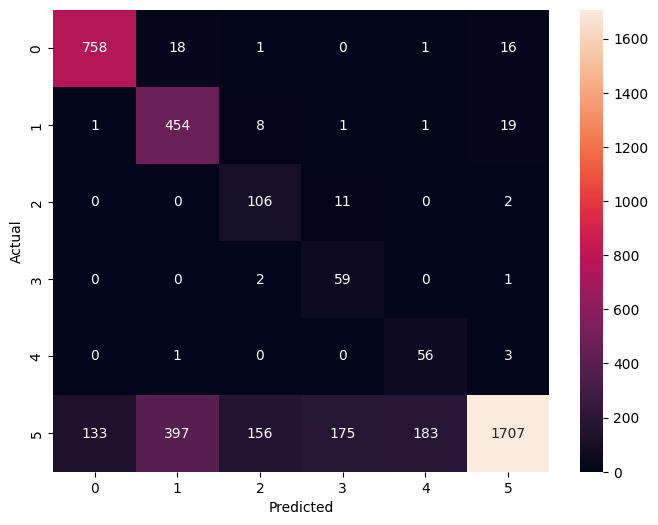

In [55]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### OverSampling

In [71]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(sampling_strategy="not majority")

In [72]:
#Same as the function undersample but the majority classes will keep size rows
def undersample_majorities_class(X, y, size):
    UNDER = 4                                       #topics == 4 is the under label
    y_min = y[y == UNDER]
    y_res = y_min
    
    for i in [0, 1, 2, 3, 5]:
        y_i = y[y == i]
        X_i = X.filter(y_i.index,axis = 0)
        if len(y_i) > size:
            y_i = sample_together(size, X_i, y_i)
        y_res = pd.concat([y_res, y_i]).sample(frac=1)
        
    X_res = X.filter(y_res.index,axis = 0)
    return X_res, y_res

In [73]:
X_train_over, y_train_over = undersample_majorities_class(X_train, y_train, size=3000)

In [74]:
#Vectorized the data
X_train_over = vectorizer.fit_transform(X_train_over).toarray()
X_test_over = vectorizer.transform(X_test).toarray()

In [75]:
X_train_over, y_train_over = ROS.fit_resample(X_train_over, y_train_over)

#### Random Forest / MultinomialNB / OneVsRest

In [76]:
clfs = cl_fit(X_train_over, y_train_over)

In [77]:
display_scores(clfs_names, clfs, X_train_over, y_train_over, X_test_over, y_test, cross_val=False)

-----------------------Score Test set-----------------------

RandomForest
accuracy : 0.8810304449648712
each f1 score : [0.90776699 0.77806341 0.74493927 0.67256637 0.78181818 0.90846813]
macro f1 score : 0.7989370585157913 

MultinomialNB
accuracy : 0.688056206088993
each f1 score : [0.86700125 0.69491525 0.35463259 0.34602076 0.35880399 0.71344765]
macro f1 score : 0.5558035830313498 

OneVsRes
accuracy : 0.9023419203747073
each f1 score : [0.92818346 0.84587156 0.73239437 0.70512821 0.78787879 0.92396093]
macro f1 score : 0.8205695516590682 



In [80]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predicted = clfs[2].predict(X_test_over)
print(clfs_names[2])
print(classification_report(y_test, predicted))

OneVsRes
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       794
           1       0.76      0.95      0.85       484
           2       0.63      0.87      0.73       119
           3       0.59      0.89      0.71        62
           4       0.72      0.87      0.79        60
           5       0.98      0.88      0.92      2751

    accuracy                           0.90      4270
   macro avg       0.76      0.90      0.82      4270
weighted avg       0.92      0.90      0.91      4270



In [69]:
def evaluation_oversampling(X_train, y_train, X_test, y_test):
    size = [500, 1000, 2000, 3000]
    ROS = RandomOverSampler(sampling_strategy="not majority")
    for s in size:
        print("Size of each category :",s)
        X_train_over, y_train_over = undersample_majorities_class(X_train, y_train, size=s)
        
        #Vectorized the data
        X_train_over = vectorizer.fit_transform(X_train_over).toarray()
        X_test_over = vectorizer.transform(X_test).toarray()
        
        X_train_over, y_train_over = ROS.fit_resample(X_train_over, y_train_over)
        
        clfs = cl_fit(X_train_over, y_train_over)
        display_scores(clfs_names, clfs, X_train_over, y_train_over, X_test_over, y_test, cross_val=False)

In [70]:
evaluation_oversampling(X_train, y_train, X_test, y_test)

Size of each category : 500
-----------------------Score Test set-----------------------

RandomForest
accuracy : 0.7255269320843092
each f1 score : [0.88550548 0.60244059 0.4296875  0.53571429 0.61363636 0.75496098]
macro f1 score : 0.6369908670665115 

MultinomialNB
accuracy : 0.5522248243559719
each f1 score : [0.86539644 0.63345196 0.25429553 0.255      0.25675676 0.52228963]
macro f1 score : 0.46453171919950575 

OneVsRes
accuracy : 0.8067915690866511
each f1 score : [0.90082645 0.71241326 0.59490085 0.5437788  0.60869565 0.83420229]
macro f1 score : 0.6991362175975476 

Size of each category : 1000
-----------------------Score Test set-----------------------

RandomForest
accuracy : 0.7918032786885246
each f1 score : [0.89505428 0.63263936 0.61627907 0.64       0.73381295 0.82478992]
macro f1 score : 0.7237625954856505 

MultinomialNB
accuracy : 0.6044496487119438
each f1 score : [0.86783042 0.64465183 0.28176101 0.29969419 0.29007634 0.60476663]
macro f1 score : 0.49813006997604

#### Neural Network

In [81]:
training_labels = tf.keras.utils.to_categorical(y_train_over)
testing_labels = tf.keras.utils.to_categorical(y_test)

In [88]:
nn = build_neural_network(X_train_over.shape[1])
history = nn.fit(X_train_over, training_labels, shuffle=True,
                    epochs=1, batch_size=4, verbose=1)

4500/4500 [==============================] - 572s 127ms/step - loss: 0.2259 - accuracy: 0.9332


In [89]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predicted = nn.predict(X_test_over)
print(classification_report(np.argmax(testing_labels, axis=1), np.argmax(predicted, axis=1)))

134/134 [==============================] - 3s 21ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       794
           1       0.80      0.90      0.85       484
           2       0.71      0.82      0.76       119
           3       0.66      0.77      0.71        62
           4       0.89      0.78      0.83        60
           5       0.96      0.91      0.93      2751

    accuracy                           0.91      4270
   macro avg       0.82      0.86      0.83      4270
weighted avg       0.92      0.91      0.91      4270



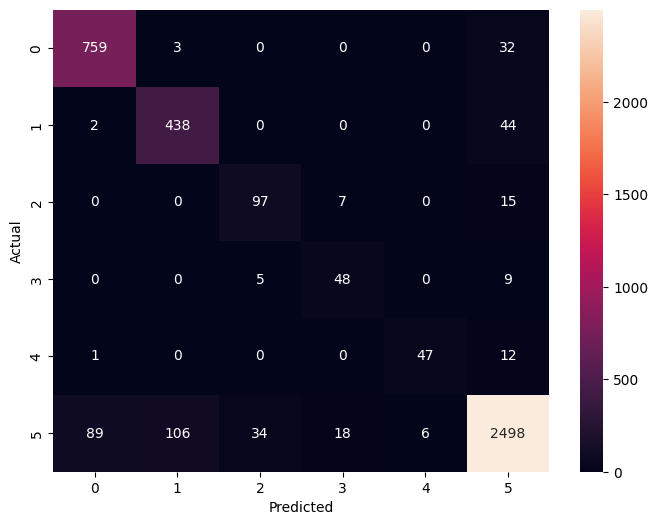

In [91]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, np.argmax(predicted, axis=1))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [93]:
# Sample
idx = X_test.sample(n=3).index
sample_X = [X_test[i] for i in idx]
sample_y = [y_test[i] for i in idx]

# Transfroming.
vectorised_documents = vectorizer.transform(sample_X)

# Execute prediction(classification).
predicted = clfs[2].predict(vectorised_documents)

# Show predicted data.
for i, category in enumerate(predicted):
    print("Predicted : {0}, True label : {1} => {2}".format(topics_names[category], topics_names[sample_y[i]], sample_X[i]))


Predicted : interest, True label : interest => 
U.K. CREDIT POLICY SEEN STEADY, DESPITE BANK DATA
    By Sandy Critchley
    LONDON, Oct 20 - An unexpectedly heavy 4.4 billion stg
surge in U.K. September sterling bank lending is unlikely to
nudge the Bank of England towards tightening monetary policy as
long as sterling remains in its present robust state,
economists said.
    An acute crisis of confidence in equity markets over the
past two days will in any case subdue personal consumer credit
demand which has largely been behind growth in lending.
    "In the normal course of events the markets would have been
extremely worried about that figure," noted Peter Spencer, U.K.
Economist with Credit Suisse First Boston.
    After an initial dip in reaction to the bank lending data,
which compared won stg August rise, U.K.
Government bonds (gilts) soared as investors continued to flee
from plummetting equities into the relative security of
government securities.
    Equity markets dropped 

## Error Analysis